### Goal: Predict if the page is being flipped using a single image

##### Evaluate model performance based on F1 score, the higher the better

##### Predict if a given sequence of images contains an action of flipping

In [1]:
import numpy as np
from glob import glob
from PIL import Image
from numpy import array
import pandas as pd
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline 

In [2]:
training_flip = np.array(glob("images/training/flip/*"))
training_notflip = np.array(glob("images/training/notflip/*"))
#flip = 1162; notflip = 1230

# print number of images in training dataset
print('Training data contains %d of images that are flipped.' % len(training_flip))
print('Training data contains %d of images that are not flipped.' % len(training_notflip))

testing_flip = np.array(glob("images/testing/flip/*"))
testing_notflip = np.array(glob("images/testing/notflip/*"))

# print number of images in testing dataset
print('\nTesting data contains %d of images that are flipped.' % len(testing_flip))
print('Testing data contains %d of images that are not flipped.' % len(testing_notflip))

Training data contains 1162 of images that are flipped.
Training data contains 1230 of images that are not flipped.

Testing data contains 290 of images that are flipped.
Testing data contains 307 of images that are not flipped.


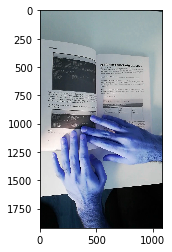

In [3]:
img = cv2.imread(training_notflip[1000])
plt.imshow(img)

In [4]:
img.shape

(1920, 1080, 3)

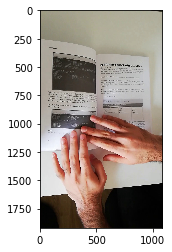

In [5]:
#OpenCV uses BGR as its default colour order for images hence the blue color. Matplotlib uses RGB. 
#Let's convert the image back to RGB 
img = cv2.cvtColor(cv2.imread(training_notflip[1000]), cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [6]:
print(img.shape) #returns 3D ndarray of row(height) x column (width) x color. shape is a tuple

(1920, 1080, 3)


In [7]:
#unpacking tuple
h, w, c = img.shape
print('height: ', h)
print('width:  ', w)
print('channel:', c)

height:  1920
width:   1080
channel: 3


In [8]:
#Performing center crop to get 500*500 dimension of each image to be used as input to CNN
def center_crop(img, dim): #dim = dimensions (width, height) to be cropped dim = (500, 500)
    width, height = img.shape[1], img.shape[0] # w, h = 1080, 1920
    # process crop width and height for max available dimension
    crop_width = dim[0] if dim[0]<img.shape[1] else img.shape[1] #cw = 500
    crop_height = dim[1] if dim[1]<img.shape[0] else img.shape[0] #ch = 500
    mid_x, mid_y = int(width/2), int(height/2) # 540, 960
    cw2, ch2 = int(crop_width/2), int(crop_height/2) #250, 250
    crop_img = img[mid_y-ch2:mid_y+ch2, mid_x-cw2:mid_x+cw2] # img[710:1210, 290:790]
    return crop_img

In [9]:
import os
# source images path to be cropped
PATH = "/Users/kavitasurasura/Desktop/Apziva/Project 4 - MonReader/images/training/flip"
img_list = os.listdir(PATH)
# create output folder to save new cropped images 
os.mkdir("training_flip_crop")

In [10]:
#training flip center cropped images
for img_f in img_list:
    img = cv2.imread(os.path.join(PATH,img_f))
    cropped_img = center_crop(img, (32,32))
    #basename = os.path.basename(os.path.join(PATH,img_f))
    cv2.imwrite('training_flip_crop/'+img_f, cropped_img)

In [11]:
#training notflip center cropped images
PATH = "/Users/kavitasurasura/Desktop/Apziva/Project 4 - MonReader/images/training/notflip"
img_list = os.listdir(PATH)
# create output folder to save new cropped images 
os.mkdir("training_notflip_crop")

for img_f in img_list:
    img = cv2.imread(os.path.join(PATH,img_f))
    cropped_img = center_crop(img, (32,32))
    #basename = os.path.basename(os.path.join(PATH,img_f))
    cv2.imwrite('training_notflip_crop/'+img_f, cropped_img)

In [12]:
os.getcwd()

'/Users/kavitasurasura/Desktop/Apziva/Project 4 - MonReader'

In [13]:
training_flip_crop = np.array(glob("training_flip_crop/*"))
training_notflip_crop = np.array(glob("training_notflip_crop/*"))

In [14]:
print('Training data contains %d of images that are flipped (cropped).' % len(training_flip_crop))
print('Training data contains %d of images that are not flipped (cropped).' % len(training_notflip_crop))

Training data contains 1162 of images that are flipped (cropped).
Training data contains 1230 of images that are not flipped (cropped).


In [15]:
tf_list = training_flip_crop.tolist()

In [16]:
df_tf = pd.DataFrame(tf_list, columns =['Images'])

In [17]:
df_tf['flip'] = 1

In [18]:
df_tf

,Images,flip
0,training_flip_crop/0005_000000020.jpg,1
1,training_flip_crop/0038_000000009.jpg,1
2,training_flip_crop/0011_000000019.jpg,1
3,training_flip_crop/0062_000000023.jpg,1
4,training_flip_crop/0038_000000021.jpg,1
...,...,...
1157,training_flip_crop/0005_000000005.jpg,1
1158,training_flip_crop/0038_000000038.jpg,1
1159,training_flip_crop/0011_000000028.jpg,1
1160,training_flip_crop/0005_000000011.jpg,1


In [19]:
tnf_list = training_notflip_crop.tolist()
df_tnf = pd.DataFrame(tnf_list, columns =['Images'])

In [20]:
df_tnf['flip'] = 0

In [21]:
df_tnf

,Images,flip
0,training_notflip_crop/0005_000000020.jpg,0
1,training_notflip_crop/0011_000000019.jpg,0
2,training_notflip_crop/0005_000000008.jpg,0
3,training_notflip_crop/0038_000000021.jpg,0
4,training_notflip_crop/0011_000000025.jpg,0
...,...,...
1225,training_notflip_crop/0049_000000021.jpg,0
1226,training_notflip_crop/0011_000000028.jpg,0
1227,training_notflip_crop/0005_000000011.jpg,0
1228,training_notflip_crop/0038_000000004.jpg,0


In [22]:
data = pd.concat([df_tf, df_tnf],ignore_index=True)

In [23]:
data

,Images,flip
0,training_flip_crop/0005_000000020.jpg,1
1,training_flip_crop/0038_000000009.jpg,1
2,training_flip_crop/0011_000000019.jpg,1
3,training_flip_crop/0062_000000023.jpg,1
4,training_flip_crop/0038_000000021.jpg,1
...,...,...
2387,training_notflip_crop/0049_000000021.jpg,0
2388,training_notflip_crop/0011_000000028.jpg,0
2389,training_notflip_crop/0005_000000011.jpg,0
2390,training_notflip_crop/0038_000000004.jpg,0


In [24]:
data.to_csv ('data_df.csv', header=True, index=False)

In [25]:
monreader_data = pd.read_csv('data_df.csv')

In [26]:
monreader_data.head(-10)

,Images,flip
0,training_flip_crop/0005_000000020.jpg,1
1,training_flip_crop/0038_000000009.jpg,1
2,training_flip_crop/0011_000000019.jpg,1
3,training_flip_crop/0062_000000023.jpg,1
4,training_flip_crop/0038_000000021.jpg,1
...,...,...
2377,training_notflip_crop/0001_000000010.jpg,0
2378,training_notflip_crop/0028_000000014.jpg,0
2379,training_notflip_crop/0015_000000015.jpg,0
2380,training_notflip_crop/0015_000000001.jpg,0


In [27]:
#test data - should we apply center crop to test data? or just combine flip and notflip and 
#save as csv with/without labels

In [28]:
#testing flip center cropped images
PATH = "/Users/kavitasurasura/Desktop/Apziva/Project 4 - MonReader/images/testing/flip"
img_list = os.listdir(PATH)
# create output folder to save new cropped images 
os.mkdir("testing_flip_crop")

for img_f in img_list:
    img = cv2.imread(os.path.join(PATH,img_f))
    cropped_img = center_crop(img, (32,32))
    #basename = os.path.basename(os.path.join(PATH,img_f))
    cv2.imwrite('testing_flip_crop/'+img_f, cropped_img)

In [29]:
#testing notflip center cropped images
PATH = "/Users/kavitasurasura/Desktop/Apziva/Project 4 - MonReader/images/testing/notflip"
img_list = os.listdir(PATH)
# create output folder to save new cropped images 
os.mkdir("testing_notflip_crop")

for img_f in img_list:
    img = cv2.imread(os.path.join(PATH,img_f))
    cropped_img = center_crop(img, (32,32))
    #basename = os.path.basename(os.path.join(PATH,img_f))
    cv2.imwrite('testing_notflip_crop/'+img_f, cropped_img)

In [30]:
testing_flip_crop = np.array(glob("testing_flip_crop/*"))
testing_notflip_crop = np.array(glob("testing_notflip_crop/*"))

In [31]:
print('Testing data contains %d of images that are flipped (cropped).' % len(testing_flip_crop))
print('Testing data contains %d of images that are not flipped (cropped).' % len(testing_notflip_crop))

Testing data contains 290 of images that are flipped (cropped).
Testing data contains 307 of images that are not flipped (cropped).


In [32]:
testflip_list = testing_flip_crop.tolist()
df_testflip = pd.DataFrame(testflip_list, columns =['Images'])
df_testflip['flip'] = 1
df_testflip

,Images,flip
0,testing_flip_crop/0005_000000008.jpg,1
1,testing_flip_crop/0063_000000011.jpg,1
2,testing_flip_crop/0004_000000006.jpg,1
3,testing_flip_crop/0012_000000008.jpg,1
4,testing_flip_crop/0061_000000026.jpg,1
...,...,...
285,testing_flip_crop/0015_000000029.jpg,1
286,testing_flip_crop/0062_000000006.jpg,1
287,testing_flip_crop/0062_000000012.jpg,1
288,testing_flip_crop/0038_000000010.jpg,1


In [33]:
testnotflip_list = testing_notflip_crop.tolist()
df_testnotflip = pd.DataFrame(testnotflip_list, columns =['Images'])
df_testnotflip['flip'] = 0
df_testnotflip

,Images,flip
0,testing_notflip_crop/0038_000000009.jpg,0
1,testing_notflip_crop/0004_000000012.jpg,0
2,testing_notflip_crop/0006_000000025.jpg,0
3,testing_notflip_crop/0006_000000019.jpg,0
4,testing_notflip_crop/0015_000000018.jpg,0
...,...,...
302,testing_notflip_crop/0010_000000026.jpg,0
303,testing_notflip_crop/0039_000000022.jpg,0
304,testing_notflip_crop/0004_000000023.jpg,0
305,testing_notflip_crop/0005_000000005.jpg,0


In [34]:
test_data = pd.concat([df_testflip, df_testnotflip],ignore_index=True)
test_data

,Images,flip
0,testing_flip_crop/0005_000000008.jpg,1
1,testing_flip_crop/0063_000000011.jpg,1
2,testing_flip_crop/0004_000000006.jpg,1
3,testing_flip_crop/0012_000000008.jpg,1
4,testing_flip_crop/0061_000000026.jpg,1
...,...,...
592,testing_notflip_crop/0010_000000026.jpg,0
593,testing_notflip_crop/0039_000000022.jpg,0
594,testing_notflip_crop/0004_000000023.jpg,0
595,testing_notflip_crop/0005_000000005.jpg,0


In [35]:
test_data.to_csv ('testdata_df.csv', header=True, index=False)

In [36]:
monreader_testdata = pd.read_csv('testdata_df.csv')

In [37]:
monreader_testdata

,Images,flip
0,testing_flip_crop/0005_000000008.jpg,1
1,testing_flip_crop/0063_000000011.jpg,1
2,testing_flip_crop/0004_000000006.jpg,1
3,testing_flip_crop/0012_000000008.jpg,1
4,testing_flip_crop/0061_000000026.jpg,1
...,...,...
592,testing_notflip_crop/0010_000000026.jpg,0
593,testing_notflip_crop/0039_000000022.jpg,0
594,testing_notflip_crop/0004_000000023.jpg,0
595,testing_notflip_crop/0005_000000005.jpg,0


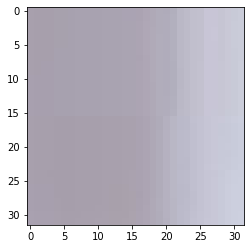

In [38]:
plt.imshow(cv2.cvtColor(cv2.imread(monreader_testdata['Images'][0]), cv2.COLOR_BGR2RGB))

In [39]:
import torch
#import torchvision
#import torchvision.transforms as transforms

In [40]:
#transform = transforms.Compose(
#    [transforms.ToTensor(),
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [41]:
batch_size = 4

In [42]:
#classes = (1, 0)

In [53]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [54]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [55]:
# Custom pytorch dataloader for this dataset
class csvdataset():
    """
    Read a pandas dataframe with
    images paths and labels
    """
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        # Load image data and get label
        try:
            #X = Image.open(self.df['Images'][index]).convert('RGB')
            #y = torch.tensor(self.df.iloc[index,2:])
            #y = torch.tensor(self.df['flip'][index])
            img_list = []
            for img in self.df['Images'].values:
                img_np = cv2.imread(img)
                img_list.append(img_np)
            
            img_tensor = np.array(img_list)
            img_tensor = img_tensor.reshape(len(img_list), 32, 32, 3)
            img_tensor = img_tensor.astype('float32')/255
            y = self.df['flip'].values
            y = y.astype('float32')/255
            X = torch.tensor(img_tensor)
            Y = torch.tensor(y)
            #self.df.iloc[:, 0]
        except IOError as err:
            pass

        if self.transform:
            X = self.transform(X)
            
        # Sanity check
        print('id:', self.df['Images'][index], 'flip', Y, X.dtype, Y.dtype)
        return index, X, Y

In [56]:
trainset = csvdataset(monreader_data[0:4])
testset = csvdataset(monreader_testdata[0:4])

In [57]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=True, num_workers=2)

In [58]:
trainloader

In [59]:
#sample = iter(trainset)

In [60]:
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)

In [62]:
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False, num_workers=2)

In [63]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        _, inputs, labels = data
        print(inputs.dtype)
        inputs_new = torch.squeeze(inputs)
        labels_new = torch.squeeze(labels)
        inputs_new = inputs_new.permute(0, 3, 1, 2)
        print(i, inputs_new.dtype, labels_new.dtype)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs_new)
        loss = criterion(outputs, labels_new)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        print(running_loss)
        #if i % 1 == 0:    # print every 2000 mini-batches
         #   print('[%d, %5d] loss: %.3f' %
          #        (epoch + 1, i + 1, running_loss / 2000))
           # running_loss = 0.0

print('Finished Training')

id: training_flip_crop/0011_000000019.jpg flip tensor([0.0039, 0.0039, 0.0039, 0.0039]) torch.float32 torch.float32
id: training_flip_crop/0062_000000023.jpg flip tensor([0.0039, 0.0039, 0.0039, 0.0039]) torch.float32 torch.float32
id: training_flip_crop/0038_000000009.jpg flip tensor([0.0039, 0.0039, 0.0039, 0.0039]) torch.float32 torch.float32
id: training_flip_crop/0005_000000020.jpg flip tensor([0.0039, 0.0039, 0.0039, 0.0039]) torch.float32 torch.float32
torch.float32
0 torch.float32 torch.float32


RuntimeError: expected scalar type Long but found Float